In [1]:
from datascience import *
import numpy as np
%matplotlib inline

In [2]:
babies = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week7/baby.csv')
babies

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
babies.group("Maternal Smoker", np.average)

Maternal Smoker,Birth Weight average,Gestational Days average,Maternal Age average,Maternal Height average,Maternal Pregnancy Weight average
False,123.085,279.874,27.5441,64.014,129.48
True,113.819,277.898,26.7364,64.1046,126.919


In [4]:
babies_weights_smoking = babies.select("Maternal Smoker", "Birth Weight")

def test_statistic(table, group, value):
    tbl = table.select(group, value)
    group = tbl.group(group, np.average)
    return group.column(1).item(1) - group.column(1).item(0)

test_statistic(babies, "Maternal Smoker", "Birth Weight")

-9.266142572024918

In [5]:
babies_weights_smoking.sample(with_replacement=False).column(1)

array([112, 123, 117, ..., 114, 160, 122])

In [6]:
babies_weights_smoking.show(2)

Maternal Smoker,Birth Weight
False,120
False,113


In [8]:
babies_weights_smoking_permute = babies_weights_smoking.with_column("Permuted", babies_weights_smoking.sample(with_replacement=False).column(1))

In [21]:
babies_maternal = babies.select("Maternal Smoker", "Maternal Pregnancy Weight")

In [10]:
babies_weights_smoking_permute.group("Maternal Smoker", np.average)

Maternal Smoker,Birth Weight average,Permuted average
False,123.085,118.803
True,113.819,120.49


In [12]:
test_statistic(babies_weights_smoking_permute, "Maternal Smoker", "Permuted")

1.687398875634159

In [22]:
repetitions = 1000
statistics = make_array()
for i in np.arange(repetitions):
    permuted_table = babies_maternal.with_column("Permuted", babies_weights_smoking.sample(with_replacement=False).column(1))
    statistics = np.append(statistics,test_statistic(permuted_table, "Maternal Smoker", "Permuted"))
statistics

array([ 1.10072977e+00,  5.21215168e-01, -1.29602815e+00,  3.56661639e-01,
        1.16985846e-01,  6.71459695e-01, -5.48382772e-01,  1.58008136e+00,
        6.57150692e-01, -1.36399592e+00,  9.50485245e-01, -3.65942989e-01,
        9.61216997e-01,  3.78125143e-01, -1.23521489e+00,  1.77799107e-01,
       -2.02221003e+00, -1.39261392e+00, -1.13505188e+00, -7.59440559e-01,
        3.56661639e-01,  2.37780825e+00, -1.22689946e-01, -1.30318266e+00,
        1.43341408e+00, -7.09359051e-01,  2.20726115e-01, -1.00984810e+00,
        3.81702393e-01, -8.33401892e-02,  7.71622713e-01,  8.71785731e-01,
       -1.05277511e+00,  1.46203209e+00,  8.36013224e-01, -1.03488886e+00,
        6.32109938e-01,  1.69455338e+00, -1.55001295e+00, -2.19275713e-01,
        1.19731554e+00,  3.78125143e-01, -5.82994348e-02, -1.94708777e+00,
       -1.01226442e-01,  7.03654951e-01,  1.05422551e+00, -2.72934473e-01,
        8.68208480e-01, -1.53212670e+00,  1.61943111e+00,  5.14060667e-01,
        1.20089279e+00, -

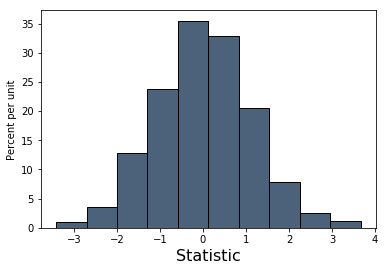

In [23]:
Table().with_column('Statistic', statistics).hist()

In [17]:
empirical_value = test_statistic(babies, "Maternal Smoker", "Birth Weight")
empirical_value

-9.266142572024918

In [19]:
sum(statistics <= empirical_value)/repetitions

0.0